# Machine Learning 441 - Assignment 1


The following notebook contains...


## Imports


In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.manifold import TSNE

## 1. Data


In [2]:
# Read dateset and replace '?' with NaN
warnings.filterwarnings('ignore')
df = pd.read_excel('DryBeanDataset.xlsx')
df = df.replace('?', np.nan)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.827650,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.802640,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


## 2. Table of Features


In [3]:
# Summary of numerical features
df_characteristics_numerical = pd.DataFrame(columns=['Type', 'Range', 'Mean', 'Median', 'Standard Deviation', 'Missing Values'])

# Function to calculate characteristics
def calculate_characteristics(series):
    return {
        'Range': (round(series.min(), 3), round(series.max(), 3)),
        'Mean': round(series.mean(), 3),
        'Median' : round(series.median(), 3),
        'Standard Deviation': round(series.std(), 3),
        'Missing Values': series.isnull().sum()
    }

# Adding characteristics to the DataFrame
df_characteristics_numerical.loc['Area'] = ['int'] + list(calculate_characteristics(df['Area']).values())
df_characteristics_numerical.loc['Perimeter'] = ['float'] + list(calculate_characteristics(df['Perimeter']).values())
df_characteristics_numerical.loc['MajorAxisLength'] = ['float'] + list(calculate_characteristics(df['MajorAxisLength']).values())
df_characteristics_numerical.loc['MinorAxisLength'] = ['float'] + list(calculate_characteristics(df['MinorAxisLength']).values())
df_characteristics_numerical.loc['AspectRation'] = ['float'] + list(calculate_characteristics(df['AspectRation']).values())
df_characteristics_numerical.loc['Eccentricity'] = ['float'] + list(calculate_characteristics(df['Eccentricity']).values())
df_characteristics_numerical.loc['ConvexArea'] = ['int'] + list(calculate_characteristics(df['ConvexArea']).values())
df_characteristics_numerical.loc['EquivDiameter'] = ['float'] + list(calculate_characteristics(df['EquivDiameter']).values())
df_characteristics_numerical.loc['Extent'] = ['float'] + list(calculate_characteristics(df['Extent']).values())
df_characteristics_numerical.loc['Solidity'] = ['float'] + list(calculate_characteristics(df['Solidity']).values())
df_characteristics_numerical.loc['roundness'] = ['float'] + list(calculate_characteristics(df['roundness']).values())
df_characteristics_numerical.loc['Compactness'] = ['float'] + list(calculate_characteristics(df['Compactness']).values())
df_characteristics_numerical.loc['ShapeFactor1'] = ['float'] + list(calculate_characteristics(df['ShapeFactor1']).values())
df_characteristics_numerical.loc['ShapeFactor2'] = ['float'] + list(calculate_characteristics(df['ShapeFactor2']).values())
df_characteristics_numerical.loc['ShapeFactor3'] = ['float'] + list(calculate_characteristics(df['ShapeFactor3']).values())
df_characteristics_numerical.loc['ShapeFactor4'] = ['float'] + list(calculate_characteristics(df['ShapeFactor4']).values())
df_characteristics_numerical.loc['ShapeFactor5'] = ['float'] + list(calculate_characteristics(df['ShapeFactor5']).values())
df_characteristics_numerical.loc['ShapeFactor6'] = ['float'] + list(calculate_characteristics(df['ShapeFactor6']).values())

df_characteristics_numerical

,Type,Range,Mean,Median,Standard Deviation,Missing Values
Area,int,"(20420, 254616)",53048.285,44652.000,29324.096,0
Perimeter,float,"(524.736, 1985.37)",855.283,794.941,214.290,0
MajorAxisLength,float,"(183.601, 738.86)",320.142,296.883,85.694,0
MinorAxisLength,float,"(122.513, 460.198)",202.271,192.432,44.970,0
AspectRation,float,"(1.025, 2.43)",1.583,1.551,0.247,0
Eccentricity,float,"(0.219, 0.911)",0.751,0.764,0.092,0
ConvexArea,int,"(-30, 263261)",53765.693,45178.000,29778.009,0
EquivDiameter,float,"(0.161, 3014441.239)",476.254,238.438,25836.866,0
Extent,float,"(0.555, 0.866)",0.750,0.760,0.049,6
Solidity,float,"(0.919, 0.995)",0.987,0.988,0.005,0


In [4]:
# Summary of categorical features
df_characteristics_categorical = pd.DataFrame(columns=['Type', 'Categories', 'Majority', 'Minority', 'Missing Values'])

def calculate_characteristics_categorical(series):
    return {
        'Categories': series.unique(),
        'Majority': (series.value_counts().idxmax(), round(series.value_counts().max()/series.value_counts().sum(), 2)),
        'Minority': (series.value_counts().idxmin(), round(series.value_counts().min()/series.value_counts().sum(), 2)),
        'Missing Values': series.isnull().sum()
    }

df_characteristics_categorical.loc['Constantness'] = ['binary'] + list(calculate_characteristics_categorical(df['Constantness']).values())
df_characteristics_categorical.loc['Colour'] = ['categorical'] + list(calculate_characteristics_categorical(df['Colour']).values())
df_characteristics_categorical.loc['Class'] = ['categorical'] + list(calculate_characteristics_categorical(df['Class']).values())

df_characteristics_categorical

,Type,Categories,Majority,Minority,Missing Values
Constantness,binary,"[1, 0]","(1, 0.9)","(0, 0.1)",0
Colour,categorical,"[brown, black, green, white, nan]","(brown, 0.45)","(white, 0.14)",6
Class,categorical,"[CALI, DERMASON, SEKER, BOMBAY, SIRA, nan, HOR...","(DERMASON, 0.26)","(BOMBAY, 0.04)",17


## 3. Data Quality Issues


### Missing Values


As can be seen from table \_\_\_ there are missing values present in 4 columns: Extent, Compactness, Colour and Class. Since there is no overlap in the entries containing missing values, a total of 47 entries are incomplete.


### Outliers


There are two types of outliers: valid outliers and invalid outliers. The former refers to observations that weren't captured incorrectly, but are rather just different compared to the central tendency of their respective class. The latter refers to observations which were captured incorrectly in one or more features. Such observations should immediately be dealt with. We start be outlining these cases.


The following values are found to be incorrect according to the maximum and minimum values for the given feature. In each case the entries shall be removed. The first entry is a convex area of -30. Given that an area cannot be negative, this value is clearly incorrect. The second concerns the equivalent diameter column. Two entries have values of 3014441.24 and 24100.35 respectively. Given that the next largest value is 569.37, these two entries are clear mistakes. Furthermore, the smallest entry has a value of 0.16141 in comparison with the next value of 161.24.

To confirm these results we also note that many features have been derived from earlier features. For example, the equivalent diameter is calculated as \_\_\_\_. Using these calculations we can check the entire dataset to identify possible mistakes.


In [5]:
# Calculated derived
df_fixed = df.copy()
df_fixed['ExpectedEquivDiameter'] = np.sqrt((4 * df_fixed['Area']) / np.pi)
incorrect_values = df_fixed[df_fixed['EquivDiameter'].round(4) != df_fixed['ExpectedEquivDiameter'].round(4)]
print(incorrect_values[['Area', 'EquivDiameter', 'ExpectedEquivDiameter']])
df_fixed['EquivDiameter'] = df_fixed['ExpectedEquivDiameter']
df_fixed = df_fixed.drop(columns=['ExpectedEquivDiameter'])

       Area  EquivDiameter  ExpectedEquivDiameter
2762  45750   2.410035e+04             241.351837
4780  71368   3.014441e+06             301.444124
5884  20464   1.614174e-01             161.417391


The result is that the same 3 values of equivalent diameter identified above, were found to be incorrect. Luckily, this means that instead of having to impute or remove these values, we can enter the true values based off the calculations.


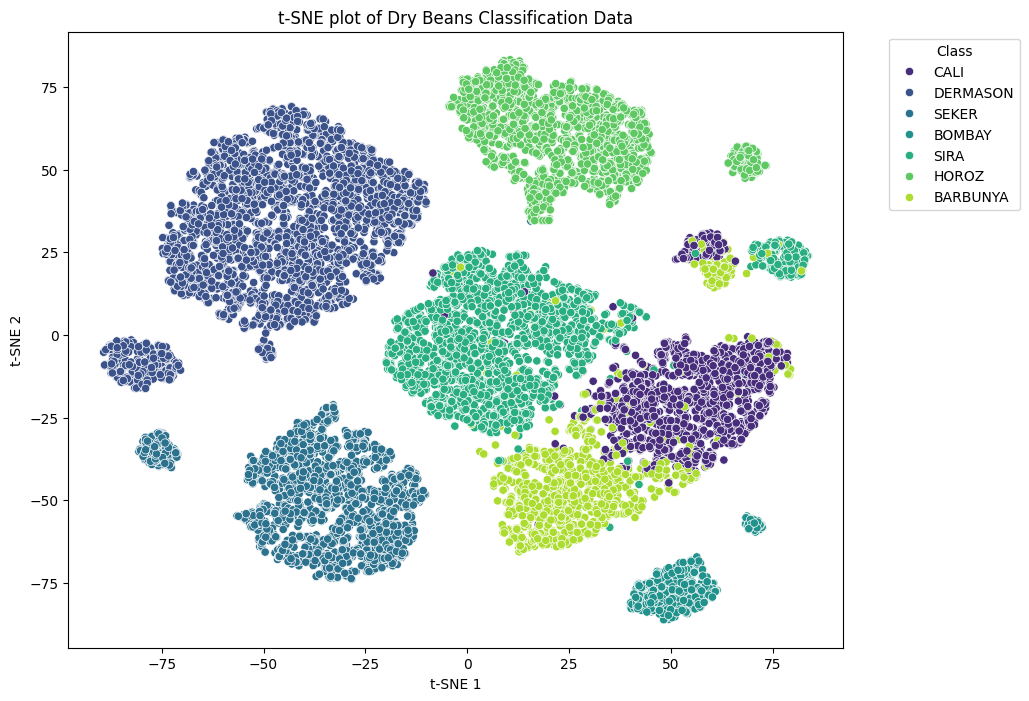

In [6]:
# t-SNE plot of the data

df_tsne = df_fixed.dropna()

# Separate features and labels
X = df_tsne.drop(columns=['Class'])  # Assuming 'Class' is the column with the labels
X = pd.get_dummies(X)

y = df_tsne['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame with t-SNE results and labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Class'] = y.values

# Plot with Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Class', palette='viridis', data=tsne_df)
plt.title("t-SNE plot of Dry Beans Classification Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Next, we focus on valid outliers present in each of the feature variables. We make use of the Inter Quartile Range (IQR) and consider values outside the range of (25th Percentile–1.5x Inter Quartile Range) to (75th Percentile + 1.5x Inter Quartile Range) as outliers where IQR is defined as 75th Percentile – 25th Percentile. The following table contains the number of valid outliers in each feature variable.


In [7]:
# Table with the number of valid outliers in each feature variable using IQR method
df_outliers = pd.DataFrame(columns=['Outliers'])

def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return series[(series < lower_bound) | (series > upper_bound)].count()

df_outliers.loc['Area'] = calculate_outliers(df_fixed['Area'])
df_outliers.loc['Perimeter'] = calculate_outliers(df_fixed['Perimeter'])
df_outliers.loc['MajorAxisLength'] = calculate_outliers(df_fixed['MajorAxisLength'])
df_outliers.loc['MinorAxisLength'] = calculate_outliers(df_fixed['MinorAxisLength'])
df_outliers.loc['AspectRation'] = calculate_outliers(df_fixed['AspectRation'])
df_outliers.loc['Eccentricity'] = calculate_outliers(df_fixed['Eccentricity'])
df_outliers.loc['ConvexArea'] = calculate_outliers(df_fixed['ConvexArea'])
df_outliers.loc['EquivDiameter'] = calculate_outliers(df_fixed['EquivDiameter'])
df_outliers.loc['Extent'] = calculate_outliers(df_fixed['Extent'])
df_outliers.loc['Solidity'] = calculate_outliers(df_fixed['Solidity'])
df_outliers.loc['roundness'] = calculate_outliers(df_fixed['roundness'])
df_outliers.loc['Compactness'] = calculate_outliers(df_fixed['Compactness'])
df_outliers.loc['ShapeFactor1'] = calculate_outliers(df_fixed['ShapeFactor1'])
df_outliers.loc['ShapeFactor2'] = calculate_outliers(df_fixed['ShapeFactor2'])
df_outliers.loc['ShapeFactor3'] = calculate_outliers(df_fixed['ShapeFactor3'])
df_outliers.loc['ShapeFactor4'] = calculate_outliers(df_fixed['ShapeFactor4'])

df_outliers

,Outliers
Area,551
Perimeter,500
MajorAxisLength,379
MinorAxisLength,569
AspectRation,473
Eccentricity,843
ConvexArea,550
EquivDiameter,526
Extent,275
Solidity,778


### Noise


By investigating the t-SNE plot we can identify several points on the boundary between clusters, or clusters directly next to each other. These points can definitely impact the models ability to discern between classes amd thus should be taken note of.


### Imbalanced Data


Class imbalance can affect a plethera of machine learning algorithms and are thus an important quality to address. Below we see a large difference between the most common class (Dermason) and the least common (Bombay) with fractions of 26.02% and 3.83% respectively.


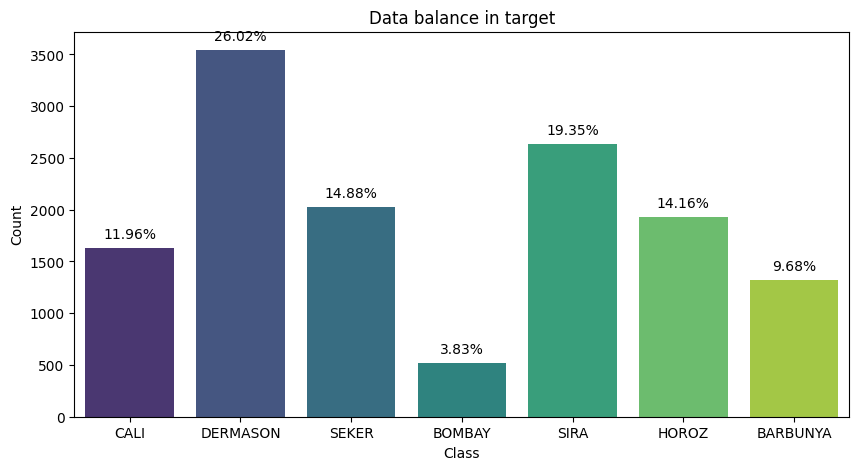

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# View Data balance in target using bar plot
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Class', data=df_fixed, palette='viridis')
plt.title('Data balance in target')
plt.xlabel('Class')
plt.ylabel('Count')

# Calculate percentages
total = len(df['Class'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# 4. Discuss Algorithm Implementation


For comparison we will consider two approaches. We first consider methods of preprocessing the data to deal with some data quality issues, and then fit both methods using the popular sklearn library. Thereafter, we develop two custom methods aiming to be robust to these quality issues.


## k-NN


Sklearn: The sklearn implementation of k-Nearest Neighbors (k-NN) is provided by the KNeighborsClassifier class in the scikit-learn library, which offers a robust and efficient way to perform k-NN classification. This implementation supports various distance metrics such as Euclidean, Manhattan, and Minkowski, and allows for both uniform and distance-weighted voting schemes. The class includes methods for fitting the model to training data (fit), predicting labels for test data (predict), and evaluating the model's performance (score). Additionally, it provides options for handling multi-class classification and supports efficient computation through the use of KD-Trees or Ball Trees for large datasets. The sklearn implementation is highly optimized and integrates seamlessly with other components of the scikit-learn ecosystem, making it a versatile choice for k-NN classification tasks. One important shortcoming to take note of, is that it cannot handle missing data and requires such entries to be imputed. Thus, the effectiveness of this algorithm, is in some way also reliant on effective imputation.

Custom: The provided implementation defines a custom k-Nearest Neighbors (k-NN) model class, knn_model, which supports various distance metrics including Euclidean, Manhattan, Minkowski, and Cosine. The class includes methods for fitting the model with training data (fit), calculating distances between data points (distance), predicting labels for test data (predict), and evaluating the model's accuracy (score). The predict method uses Shepard's method to apply weighted voting based on the inverse of distances to the nearest neighbors. The class also includes methods for getting and setting hyperparameters (get_params and set_params). The implementation handles missing values by masking them during distance calculations and ensures numerical stability by adding a small constant to avoid division by zero in the weighting step.


## Classification Tree


Sklearn: The sklearn implementation of DecisionTreeClassifier in the scikit-learn library provides a highly efficient and flexible way to perform decision tree classification. This class supports various criteria for splitting nodes, such as Gini impurity and information gain (entropy), and can handle both numerical and categorical data (technically because they have to be encoded using either a label encoder or one hot encoding). The fit method is used to train the model on the provided dataset, while the predict method is used to classify new data points. Additionally, the score method evaluates the model's accuracy on test data. The implementation includes options for pruning the tree to avoid overfitting, such as setting the maximum depth, minimum samples per leaf, and minimum impurity decrease. The DecisionTreeClassifier integrates seamlessly with other components of the scikit-learn ecosystem, making it a versatile and powerful tool for classification tasks. Furthermore, the algorithm will by default fit an overfitted tree, which can then be pruned using cost complexity pruning to ensure better generalisation to unseen data and robustness to noise.

Custom: The provided implementation defines a ClassificationTreeModel class for building and using a classification tree, which includes a nested TreeNode class to represent nodes in the tree. The model uses entropy and information gain ratio to determine the best splits for the data, handling missing values by masking them during calculations and distributing them proportionally between child nodes. The fit method builds the tree recursively by selecting the best feature and threshold for splits, while the predict method traverses the tree to classify new data points. The model also includes an accuracy method to evaluate its performance and a prune method to optimize the tree by removing branches that do not improve validation accuracy. The implementation ensures numerical stability and handles both numeric and categorical features.


# 5. Data-preprocessing


Summary:

For each: Drop entries with missing targets? Why?

- **KNN custom:** How does it handle missing values? Why is it robust to outliers and noise? How does it handle imbalance? One-hot-encode colour, encode output labels, scale, why?
- **KNN sklearn:** Must impute missing values, how? ...
- **Tree custom:**
- **Tree sklearn:**


Before discussing the preprocessing techniques specific to each model, we consider the techniques applied before all modeling cases. Firstly, the previously identified invalid outliers were immediately removed or imputed. A reminder that the negative convex area was replaced with a missing values, and the three identified entries in equivalent diamter, were promptly recalculated and replaced with the correct values.

Secondly, all entries with missing targets were removed. SInce these entries formed such a small fraction of the total data, a mere 0.125%, we trust this procedure won't have a noticeble effect on model performance. Furthermore, imputation of these values was otherwise impossible, since they are not clearly derived from another feature, if this were the case then the application of machine learning would not be necessary, and using a machine learning approach to approximate these labels is exactly what this analysis aims to do. Therefore, these entries are unnecessary for training and promptly removed.

Finally, the sort order column is removed, since it does not have any correlation with the target, and appears to have been used for an external factor not directly associated with the task of predicting bean class.


In each case for each of the 4 models, the following preprocessing techinques will be considered. In each case, we shall either explain why it need not be addressed, or how to address it.

1. Missing values
2. Outliers
3. Noise
4. Imbalance
5. One hot encoding
6. Label encoding
7. Scaling


## kNN custom

1. **Missing values:** The custom model does not require missing values to be imputed and simply excludes these values from the distance calculation. In theory, this method should be fine as long as the number of missing values per entry are not high, which is the case since each of the missing values belong to a unique entry.
2. **Outliers:** The nearest neighbours algorithm is robust to outliers given that the number of neighbours is correctly chosen, since these outliers won't be nearest neighbours.
3. **Noise:** Much like outliers, noise is easily dealt with by carefully choosing the number of nieghbours, such that it is large enough to be unaffected by noise, and small enough to be precise.
4. **Imbalance:** Class imbalance is can greatly affect the performance of a nearest neighbours algorithm, since any majority class in the vacinity of a minority class, will outvote that class. This is especially the case when considering our previous t-SNE plot, which showcases the proximity between our minority and majority class. For this reason, the algorithm uses Sheppard's method to assign weights to the neighbours inversely propotional to there distance from the point being classified. This ensures the local proximity of minority classes are given more weight.
5. **One hot encoding:** The categorical feature colour is one-hot-encoded because a numerical attribute is required in most distance calculations. Even though this isn't strictly the case, because one can use multiple distance metrics, to avoid unnessesary complexity we prefer to use a single approach. Furthermore, since the feature is nominal, one-hot-encoding is prefered since the order of the encoded features would not be meaningful.
6. **Label encoding:** The labels are encoded using sklearn's label encoder. This step is necessary since the implementation makes use of specific functions that require numerical output, and also uses encoded labels to index into a list. The use of these functions offers greatly computational advantages.
7. **Scaling:** The final step involves scaling the input features. Not doing so, would apply a higher weight to features of a larger scale, which is not the target behaviour. Thus, to ensure fair weighting between all features, they are scaled.


## kNN sklearn

1. **Missing values:** Unfortunately, sklearn's implementation of k nearest neighbours cannot handle missing values and thus these values are imputed. We impute numerical features using the median and categorical features using the mode.
2. **Outliers:** The nearest neighbours algorithm is robust to outliers given that the number of neighbours is correctly chosen, since these outliers won't be nearest neighbours.
3. **Noise:** Much like outliers, noise is easily dealt with by carefully choosing the number of nieghbours, such that it is large enough to be unaffected by noise, and small enough to be precise.
4. **Imbalance:** Sklearn also provides sheppard's method through a weight parameter which if set to 'distance' will result in the same inverse distance weight applied like before.
5. **One hot encoding:** The library requires categorical features to be encoded. Again, one-hot-encoding is the method of choice given that the feature is nominal.
6. **Label encoding:** The labels are encoded using sklearn's label encoder as required by the model.
7. **Scaling:** All features are scaled to ensure equal weighting.


## Classification Tree Custom

1. **Missing values:** The custom model implicitly handles missing values by distributing them across all child nodes during the split. This approach ensures that missing values do not bias the model towards any particular outcome, as they are considered in all possible splits.
2. **Outliers:** The tree is robust to ouliers since these points will reside in their own terminal nodes when fitting the full tree. Then, during the pruning process these leaves will be joined and outvoted.
3. **Noise:** Much like outliers, noisy instances will reside in their own leaves and pruned away.
4. **Imbalance:** Class imbalance is can greatly affect the performance of a classification tree, by inducing bias during the pruning stage to the majority class. To avoid this occurence, classes are given weights inversely proportional to the number of instances belonging to that class. Thus, providing minority instances with a heavier weight to ensure greater voting power.
5. **One hot encoding:** The categorical feature colour is one-hot-encoded because a numerical attributes are computationally easier to utilise. Specifically, during vectorized operations numerical values are typically required.
6. **Label encoding:** Similarly, the target labels are encoded so they may be more efficiently applied for tasks like array indexing.
7. **Scaling:** Features are considered indepently in a decision tree, thus scaling of the input features are unnecessary. In fact, not scaling ensures better interpretability of the classification rules induces by the tree.


## Classification Tree Sklearn

1. **Missing values:** Again, sklearn's implementation does not implicitly handle missing values. Therefore, imputation is necessary by using the mode in categorical features and the median in numerical features.
2. **Outliers:** The tree is robust to ouliers since these points will reside in their own terminal nodes when fitting the full tree. Then, during the pruning process these leaves will be joined and outvoted. This fact remains true even when using cost-complexity pruning.
3. **Noise:** Much like outliers, noisy instances will reside in their own leaves and pruned away.
4. **Imbalance:** Class imbalance can greatly affect the performance of a classification tree, by inducing bias during the pruning stage to the majority class. To avoid this occurence, classes are given weights inversely proportional to the number of instances belonging to that class. Thus, providing minority instances with a heavier weight to ensure greater voting power.
5. **One hot encoding:** The categorical feature colour is one-hot-encoded because such values are necessary in use with the sklearn library.
6. **Label encoding:** Similarly, the target labels are also required to be encoded.
7. **Scaling:** Features are considered indepently in a decision tree, thus scaling of the input features are not unnecessary. In fact, not scaling ensures better interpretability of the classification rules induces by the tree.


# 6. Implementation


## k-NN


### Custom


In [180]:
# Remove missing values in target
missingTargets = df_fixed['Class'].isnull().sum()
df_preprocess = df_fixed.dropna(subset=['Class'])
print("Missing values removed in target column: ", missingTargets)

Missing values removed in target column:  17


In [181]:
# Preprocessing

# Split the data
X = df_preprocess.drop(columns=['Class'])
y = df_preprocess['Class']

# One-hot encode the Colour column
X = pd.get_dummies(X, columns=['Colour'], prefix="is")
colour_columns = ['is_brown', 'is_black', 'is_white', 'is_green']  # Adjust as needed
all_false = (X[colour_columns] == 0).all(axis=1)
X.loc[all_false, colour_columns] = np.nan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [190]:
# Implementation

class knn_model:
    def __init__(self, k=1, distance_metric='euclidean'):
        self.k = k
        self.X_train = None
        self.y_train = None
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

        return self

    def distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            mask = ~np.isnan(x1) & ~np.isnan(x2)
            return np.sqrt(np.sum((x1[mask] - x2[mask]) ** 2))
        elif self.distance_metric == 'manhattan':
            mask = ~np.isnan(x1) & ~np.isnan(x2)
            return np.sum(np.abs(x1[mask] - x2[mask]))
        elif self.distance_metric == 'minkowski':
            mask = ~np.isnan(x1) & ~np.isnan(x2)
            return np.sum(np.abs(x1[mask] - x2[mask]) ** 3) ** (1/3)
        elif self.distance_metric == 'cosine':
            mask = ~np.isnan(x1) & ~np.isnan(x2)
            if np.linalg.norm(x1[mask]) == 0 or np.linalg.norm(x2[mask]) == 0:
                return 1  # Handle the case where one of the vectors is zero
            return 1 - np.dot(x1[mask], x2[mask]) / (np.linalg.norm(x1[mask]) * np.linalg.norm(x2[mask]))
        else:
            raise ValueError("Unknown distance metric")

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = np.array([self.distance(x, x_train) for x_train in self.X_train])
            nearest_k_indices = np.argsort(distances)[:self.k]
            nearest_k_distances = distances[nearest_k_indices]
            nearest_k_labels = self.y_train[nearest_k_indices]
            
            # Apply Shepard's method
            weights = 1 / (nearest_k_distances + 1e-10)  # Adding a small constant to avoid division by zero
            weighted_votes = np.bincount(nearest_k_labels, weights=weights)
            
            # Get the label with the highest weighted vote
            y_pred.append(np.argmax(weighted_votes))
        return y_pred
    
    def get_params(self, deep=True):
        return {'k': self.k, 'distance_metric': self.distance_metric}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

In [183]:
# Hyperparameter tuning

# Caution: This cell may take a long time to run
from sklearn.model_selection import GridSearchCV

param_grid = {
    'k': [5],#, 35, 75, 115, 155],
    'distance_metric': ['euclidean']#, 'manhattan', 'minkowski', 'cosine']
}

grid_search = GridSearchCV(knn_model(n_jobs=-1), param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'distance_metric': 'euclidean', 'k': 5}
Best score: 0.9785601681555439


In [191]:
# Performance on test set

knn = knn_model(k=5, distance_metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.87      0.90       384
      BOMBAY       1.00      1.00      1.00       170
        CALI       0.93      0.94      0.93       511
    DERMASON       1.00      1.00      1.00      1089
       HOROZ       1.00      0.99      1.00       593
       SEKER       1.00      1.00      1.00       571
        SIRA       0.97      1.00      0.98       761

    accuracy                           0.98      4079
   macro avg       0.98      0.97      0.97      4079
weighted avg       0.98      0.98      0.98      4079



### SKLearn


In [192]:
# Missing values

# Remove missing values in target
missingTargets = df_fixed['Class'].isnull().sum()
df_preprocess = df_fixed.dropna(subset=['Class'])
print("Missing values removed in target column: ", missingTargets)

# Impute numerical missing values with median
df_numerical = df.select_dtypes(include=['int', 'float'])
number_missing = df_numerical.isnull().sum().sum()
df_numerical = df_numerical.fillna(df_numerical.median())
df_preprocess[df_numerical.columns] = df_numerical
print("Number of numerical values imputed: ", number_missing)

# Impute categorical missing values with mode
df_categorical = df.select_dtypes(include=['object']).drop(columns=['Class'])
number_missing = df_categorical.isnull().sum().sum()
df_categorical = df_categorical.fillna(df_categorical.mode().iloc[0])
df_preprocess[df_categorical.columns] = df_categorical
print("Number of categorical values imputed: ", number_missing)

Missing values removed in target column:  17
Number of numerical values imputed:  29
Number of categorical values imputed:  6


In [193]:
# Preprocessing

# Split the data
X = df_preprocess.drop(columns=['Class'])
y = df_preprocess['Class']

# One-hot encode the Colour column
X = pd.get_dummies(X, columns=['Colour'], prefix="is")
colour_columns = ['is_brown', 'is_black', 'is_white', 'is_green']  # Adjust as needed
all_false = (X[colour_columns] == 0).all(axis=1)
X.loc[all_false, colour_columns] = np.nan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [197]:
# Hyperparamter tuning

from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [5, 35, 75, 115, 155],
    'metric': ['manhattan', 'euclidean', 'minkowski', 'cosine']
}

grid_search = GridSearchCV(KNeighborsClassifier(n_jobs=-1, weights='distance'), param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'metric': 'cosine', 'n_neighbors': 5}
Best score: 0.9800320759218513


In [200]:
# Performance on test set

knn = KNeighborsClassifier(n_neighbors=5, metric='cosine', weights='distance', n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.88      0.91       384
      BOMBAY       0.99      0.99      0.99       170
        CALI       0.92      0.95      0.93       511
    DERMASON       1.00      1.00      1.00      1089
       HOROZ       1.00      1.00      1.00       593
       SEKER       1.00      1.00      1.00       571
        SIRA       0.97      0.99      0.98       761

    accuracy                           0.98      4079
   macro avg       0.98      0.97      0.97      4079
weighted avg       0.98      0.98      0.98      4079



## Classification Tree


### Custom


In [16]:
# Missing Values
missingTargets = df_fixed['Class'].isnull().sum()
df_preprocess = df_fixed.dropna(subset=['Class'])
print("Missing values removed in target column: ", missingTargets)

Missing values removed in target column:  17


In [17]:
# Preprocessing

# Split the data
X = df_preprocess.drop(columns=['Class'])
y = df_preprocess['Class']

# One-hot encode the Colour column
X = pd.get_dummies(X, columns=['Colour'], prefix="is")
colour_columns = ['is_brown', 'is_black', 'is_white', 'is_green']  # Adjust as needed
all_false = (X[colour_columns] == 0).all(axis=1)
X.loc[all_false, colour_columns] = np.nan

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

In [18]:
# Implementation

import numpy as np
import pandas as pd
from collections import Counter

class ImprovedClassificationTreeModel:
    class TreeNode:
        def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

    def __init__(self, max_depth=None, min_samples_split=None):
        self.root = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-10))

    def information_gain(self, y, y_left, y_right):
        n = len(y)
        n_left, n_right = len(y_left), len(y_right)
        
        entropy_parent = self.entropy(y)
        entropy_left = self.entropy(y_left)
        entropy_right = self.entropy(y_right)
        
        gain = entropy_parent - (n_left / n) * entropy_left - (n_right / n) * entropy_right
        
        # Calculate split information
        split_info = -(n_left / n) * np.log2(n_left / n + 1e-10) - (n_right / n) * np.log2(n_right / n + 1e-10)
        
        return gain / (split_info + 1e-10)  # Add small epsilon to avoid division by zero

    def best_split(self, X, y):
        best_feature, best_threshold, best_gain_ratio = None, None, -1
        n_features = X.shape[1]
        
        for feature in range(n_features):
            feature_values = X[:, feature]
            thresholds = np.unique(feature_values)
            for threshold in thresholds:
                left_mask = feature_values <= threshold
                right_mask = ~left_mask
                
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue
                
                gain_ratio = self.information_gain(y, y[left_mask], y[right_mask])
                if gain_ratio > best_gain_ratio:
                    best_gain_ratio = gain_ratio
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        # Check stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or \
           (self.min_samples_split is not None and n_samples < self.min_samples_split) or \
           n_classes == 1:
            return self.TreeNode(value=np.argmax(np.bincount(y)))
        
        feature, threshold = self.best_split(X, y)
        if feature is None:
            return self.TreeNode(value=np.argmax(np.bincount(y)))
        
        left_mask = X[:, feature] <= threshold
        right_mask = ~left_mask
        
        left_subtree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return self.TreeNode(feature, threshold, left_subtree, right_subtree)

    def fit(self, X, y):
        # Convert pandas DataFrame to numpy array if necessary
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        
        self.root = self.build_tree(X, y)

        return self

    def predict(self, X):
        # Convert pandas DataFrame to numpy array if necessary
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        return np.array([self._predict(self.root, x) for x in X])

    def _predict(self, node, x):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict(node.left, x)
        return self._predict(node.right, x)

    def accuracy(self, X, y):
        # Convert pandas DataFrame/Series to numpy array if necessary
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        
        predictions = self.predict(X)
        return np.mean(predictions == y)

    def prune(self, X_val, y_val):
        # Convert pandas DataFrame/Series to numpy array if necessary
        if isinstance(X_val, pd.DataFrame):
            X_val = X_val.values
        if isinstance(y_val, pd.Series):
            y_val = y_val.values

        def _prune(node):
            if node.left is not None and node.right is not None:
                if node.left.value is not None and node.right.value is not None:
                    temp_value = int(np.argmax(np.bincount([node.left.value, node.right.value])))
                    temp_node = self.TreeNode(value=temp_value)
                    original_left, original_right = node.left, node.right
                    node.left, node.right = None, None
                    node.value = temp_value

                    pruned_accuracy = self.accuracy(X_val, y_val)

                    if pruned_accuracy < original_accuracy:
                        node.left, node.right = original_left, original_right
                        node.value = None
                    else:
                        nonlocal pruned
                        pruned = True
                else:
                    _prune(node.left)
                    _prune(node.right)

        original_accuracy = self.accuracy(X_val, y_val)
        pruned = True
        while pruned:
            pruned = False
            _prune(self.root)

    def get_params(self, deep=True):
        return {'max_depth': self.max_depth, 'min_samples_split': self.min_samples_split}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

In [19]:
# Custom tuning loop

from sklearn.model_selection import KFold
import numpy as np
from itertools import product

def custom_grid_search_cv(model_class, param_grid, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    best_score = -np.inf
    best_params = None
    
    # Generate all combinations of hyperparameters
    param_combinations = list(product(*param_grid.values()))
    
    for params in param_combinations:
        param_dict = dict(zip(param_grid.keys(), params))
        scores = []
        
        for train_index, val_index in kf.split(X):
            # Handle X as pandas DataFrame and y as numpy array
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            # Initialize the model with the current hyperparameters
            model = model_class(**param_dict)
            model.fit(X_train, y_train)
            model.prune(X_val, y_val)
            
            # Evaluate the model
            score = model.accuracy(X_val, y_val)
            scores.append(score)
        
        # Compute the average score for the current hyperparameters
        avg_score = np.mean(scores)
        
        # Update the best score and parameters if the current ones are better
        if avg_score > best_score:
            best_score = avg_score
            best_params = param_dict
    
    return best_params, best_score

In [60]:
# Hyperparameter tuning

param_grid = {
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [None, 2, 5, 10, 20]
} # Best was max depth none and min samples split 20 with score 0.973

# Assuming ImprovedClassificationTreeModel is defined as in the previous code
best_params, best_score = custom_grid_search_cv(ImprovedClassificationTreeModel, param_grid, X_train, y_train)

print(f'Best hyperparameters: {best_params}')
print(f'Best cross-validation score: {best_score}')

Best hyperparameters: {'max_depth': None, 'min_samples_split': 20}
Best cross-validation score: 0.9733940142580636


In [62]:
# Performance on a test set

model = ImprovedClassificationTreeModel(**best_params)
model.fit(X_train, y_train)
model.prune(X_val, y_val)

predictions = model.predict(X_test)
prediction = label_encoder.inverse_transform(predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

    BARBUNYA       0.90      0.90      0.90       258
      BOMBAY       1.00      1.00      1.00       108
        CALI       0.92      0.92      0.92       332
    DERMASON       1.00      1.00      1.00       748
       HOROZ       1.00      1.00      1.00       370
       SEKER       1.00      1.00      1.00       397
        SIRA       0.97      0.98      0.98       506

    accuracy                           0.98      2719
   macro avg       0.97      0.97      0.97      2719
weighted avg       0.98      0.98      0.98      2719



### sklearn


In [20]:
# Missing Values
missingTargets = df_fixed['Class'].isnull().sum()
df_preprocess = df_fixed.dropna(subset=['Class'])
print("Missing values removed in target column: ", missingTargets)

Missing values removed in target column:  17


In [21]:
# Preprocessing

# Split the data
X = df_preprocess.drop(columns=['Class'])
y = df_preprocess['Class']

# One-hot encode the Colour column
X = pd.get_dummies(X, columns=['Colour'], prefix="is")
colour_columns = ['is_brown', 'is_black', 'is_white', 'is_green']  # Adjust as needed
all_false = (X[colour_columns] == 0).all(axis=1)
X.loc[all_false, colour_columns] = np.nan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [24]:
# Hyperparameter tuning with cost complexity pruning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Determine the effective alphas for pruning
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Optionally, you can select a subset of alphas to reduce the search space
ccp_alphas = np.unique(np.round(ccp_alphas, decimals=4))

# Define the parameter grid including ccp_alpha
param_grid = {
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10, 20],
    'ccp_alpha': ccp_alphas,  # Add the effective alphas to the grid,
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters and score
best_params = grid_search.best_params_
print("Best parameters:", best_params)
print("Best score:", grid_search.best_score_)

Best parameters: {'ccp_alpha': np.float64(0.0004), 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best score: 0.9806623280226917


In [25]:
# Performance on a test set

model = DecisionTreeClassifier(**best_params)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
prediction = label_encoder.inverse_transform(predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.92       384
      BOMBAY       1.00      0.99      1.00       170
        CALI       0.94      0.95      0.94       511
    DERMASON       1.00      1.00      1.00      1089
       HOROZ       1.00      1.00      1.00       593
       SEKER       1.00      1.00      1.00       571
        SIRA       0.97      0.99      0.98       761

    accuracy                           0.98      4079
   macro avg       0.98      0.98      0.98      4079
weighted avg       0.98      0.98      0.98      4079



# Legacy Code I am too Afraid to lose


In [ ]:
# Legacy Classification Tree

import numpy as np
from collections import Counter

class ClassificationTreeModel:
    class TreeNode:
        def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

    def __init__(self):
        self.root = None

    def entropy(self, y, class_weights):
        unique_classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        weighted_probabilities = probabilities * np.array([class_weights[cls] for cls in unique_classes])
        return -np.sum(weighted_probabilities * np.log2(probabilities))

    def split_information(self, y, left_indices, right_indices):
        n = len(y)
        n_left, n_right = len(y[left_indices]), len(y[right_indices])
        p_left, p_right = n_left / n, n_right / n
        return - (p_left * np.log2(p_left) + p_right * np.log2(p_right))

    def information_gain(self, X, y, feature, threshold, class_weights):
        parent_entropy = self.entropy(y, class_weights)
        
        left_indices = (X[:, feature] <= threshold) & (X[:, feature] != '')
        right_indices = (X[:, feature] > threshold) & (X[:, feature] != '')
        missing_indices = (X[:, feature] == '')

        if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
            return 0
        
        n = len(y)
        n_left, n_right = len(y[left_indices]), len(y[right_indices])
        n_missing = len(y[missing_indices])
        
        e_left = self.entropy(y[left_indices], class_weights)
        e_right = self.entropy(y[right_indices], class_weights)
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        # Weighted contribution of missing values
        p_left = n_left / (n_left + n_right)
        p_right = n_right / (n_left + n_right)
        
        missing_entropy = p_left * e_left + p_right * e_right
        total_entropy = ((n_left + n_right) / n) * child_entropy + (n_missing / n) * missing_entropy
        
        gain = parent_entropy - total_entropy
        
        # Calculate split information
        split_info = self.split_information(y, left_indices, right_indices)
        if split_info == 0:
            return 0
        
        return gain / split_info

    def best_split(self, X, y, class_weights):
        best_feature, best_threshold, best_gain_ratio = None, None, -1
        n_features = X.shape[1]
        for feature in range(n_features):
            # Convert non-numeric values to np.nan
            feature_values = X[:, feature]
            feature_values = np.where(feature_values == '', np.nan, feature_values).astype(float)
            unique_values = np.unique(feature_values[~np.isnan(feature_values)])  # Ignore missing values for unique thresholds
            for threshold in unique_values:
                gain_ratio = self.information_gain(X, y, feature, threshold, class_weights)
                if gain_ratio > best_gain_ratio:
                    best_gain_ratio = gain_ratio
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold

    def build_tree(self, X, y, class_weights):
        if len(np.unique(y)) == 1:
            return self.TreeNode(value=y[0])
        feature, threshold = self.best_split(X, y, class_weights)
        if feature is None:
            return self.TreeNode(value=Counter(y).most_common(1)[0][0])
        
        left_indices = (X[:, feature] <= threshold) & (X[:, feature] != '')
        right_indices = (X[:, feature] > threshold) & (X[:, feature] != '')
        missing_indices = (X[:, feature] == '')
        
        left_subtree = self.build_tree(X[left_indices], y[left_indices], class_weights)
        right_subtree = self.build_tree(X[right_indices], y[right_indices], class_weights)
        
        # Distribute missing values proportionally
        if len(y[missing_indices]) > 0:
            p_left = len(y[left_indices]) / (len(y[left_indices]) + len(y[right_indices]))
            p_right = 1 - p_left
            if np.random.rand() < p_left:
                return left_subtree
            else:
                return right_subtree
        
        return self.TreeNode(feature, threshold, left_subtree, right_subtree)

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        class_weights = {cls: 1.0 / count for cls, count in Counter(y).items()}
        self.root = self.build_tree(X, y, class_weights)

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict(self.root, x) for x in X])

    def _predict(self, node, X):
        if node.value is not None:
            return node.value
        feature, threshold = node.feature, node.threshold
        if feature >= len(X):
            raise IndexError(f"Feature index {feature} out of range for input with shape {X.shape}")
        if isinstance(threshold, (int, float)):
            if X[feature] <= threshold:
                return self._predict(node.left, X)
            else:
                return self._predict(node.right, X)
        else:
            if X[feature] == threshold:
                return self._predict(node.left, X)
            else:
                return self._predict(node.right, X)
            
    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

    def prune(self, X_val, y_val):
        def _prune(node):
            if node.left is not None and node.right is not None:
                if node.left.value is not None and node.right.value is not None:
                    temp_value = Counter([node.left.value, node.right.value]).most_common(1)[0][0]
                    temp_node = self.TreeNode(value=temp_value)
                    original_left, original_right = node.left, node.right
                    node.left, node.right = None, None
                    node.value = temp_value

                    pruned_accuracy = self.accuracy(X_val, y_val)

                    if pruned_accuracy < original_accuracy:
                        node.left, node.right = original_left, original_right
                        node.value = None
                    else:
                        nonlocal pruned
                        pruned = True
                else:
                    _prune(node.left)
                    _prune(node.right)

        original_accuracy = self.accuracy(X_val, y_val)
        pruned = True
        while pruned:
            pruned = False
            _prune(self.root)